# Modelo de regresión lineal

El modelo de regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente numérica y continua 'y', las variables independientes 'x', así como un término aleatorio épsilon que corresponde al error o ruido de nuestros modelos. 

El objetivo final de este modelo es minimizar la distancia cuadrática de todos los puntos en relación a una recta: la recta de regresión. 

A la variable 'y' se le llama independiente, pero también vas a escuchar respuesta, y a las explicativas o regresoras 'x' también se les puede llamar dependientes. 

Al tratarse de un modelo matemático, esta aproximación a la modelización de datos requiere que se cumplan algunos supuestos. Aunque formalmente es deseable que se cumplan todos ellos, en la práctica se es bastante flexible con algunos y, pese a que muchas veces no podamos asegurarlos todos, el modelo sigue ofreciendo unos buenos resultados. 
 * que la relación entre las variables sea lineal. Esto implica que al incrementar 'x' unidades, una de las variables regresoras se incremente, en promedio, beta veces la variable respuesta. 
 * que los errores en la medición de las variables explicativas sean independientes entre sí. También se asume que las variables explicativas no están relacionadas linealmente entre ellas. 
 * se asume que los errores tengan varianza constante. En terminología matemática se expresa como que los errores son homocedásticos. Implica que si, por ejemplo, intentamos predecir los salarios en base a la edad, vamos a encontrar errores de la misma magnitud para gente joven que para gente mayor. 
 * que los errores tengan una esperanza matemática igual a cero. Los errores no van a tener sistemáticamente una tendencia positiva o negativa, es decir, vamos a predecir algunos casos por encima de su valor real y algunos por debajo, pero nunca todos por encima o todos por debajo. 
 * que el error total sea la suma de todos los errores. 
 
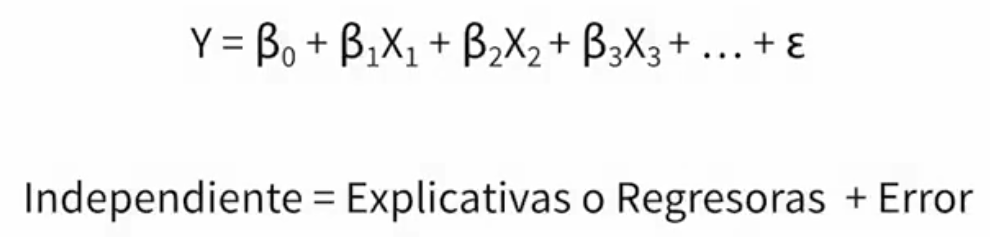

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("base_datos_2008.csv")

In [4]:
df=df.dropna(subset=["ArrDelay"])
df=df.sample(frac=1).head(100000)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5794320,2008,10,13,1,1703.0,1709,1811.0,1824,NW,1004,...,11.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4065348,2008,7,4,5,751.0,746,812.0,820,NW,1041,...,6.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4192332,2008,7,21,1,1821.0,1815,2105.0,2134,CO,1619,...,12.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6840308,2008,12,3,3,1830.0,1725,2102.0,1905,MQ,4265,...,30.0,59.0,0,NaN,0,0.0,0.0,52.0,0.0,65.0
5934724,2008,10,9,4,655.0,700,857.0,854,DL,1419,...,12.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266728,2008,1,9,3,2237.0,2230,2328.0,2323,US,1554,...,3.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3321211,2008,6,19,4,1326.0,1330,1431.0,1440,EV,4356,...,17.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4001390,2008,7,8,2,1819.0,1820,1902.0,1900,MQ,3130,...,4.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5228185,2008,9,20,6,1322.0,1330,1404.0,1416,NW,285,...,16.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
Y=df["ArrDelay"]
X=df[["DepDelay"]]

In [7]:
Y

5794320    -13.0
4065348     -8.0
4192332    -29.0
6840308    117.0
5934724      3.0
           ...  
266728       5.0
3321211     -9.0
4001390      2.0
5228185    -12.0
5143129     -4.0
Name: ArrDelay, Length: 100000, dtype: float64

In [8]:
X

,DepDelay
5794320,-6.0
4065348,5.0
4192332,6.0
6840308,65.0
5934724,-5.0
...,...
266728,7.0
3321211,-4.0
4001390,-1.0
5228185,-8.0


In [11]:
type(Y)

pandas.core.series.Series

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:
regr=linear_model.LinearRegression()
regr.fit(X,Y)

print("Coeficientes: ",regr.coef_)
Y_pred=regr.predict(X)
print("R cuadrado: ",r2_score(Y,Y_pred))

Coeficientes:  [1.01697449]
R cuadrado:  0.8638863429836798


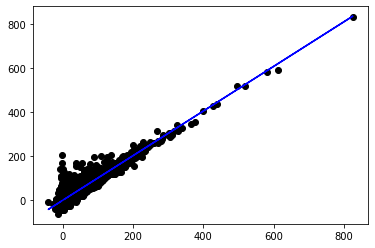

In [15]:
plt.scatter(X[1:10000],Y[1:10000],color="black")
plt.plot(X[1:10000],Y_pred[1:10000],color="Blue")
plt.show()

In [16]:
X=df[['AirTime','Distance','TaxiIn','TaxiOut']]

df['Month']=df['Month'].apply(str)
df['DayofMonth']=df['DayofMonth'].apply(str)
df['DayOfWeek']=df['DayOfWeek'].apply(str)

dummies=pd.get_dummies(data=df[['Month','DayofMonth','DayOfWeek','Origin','Dest']])
X=dummies.add(X,fill_value=0)

In [17]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=651)

In [18]:
regr=linear_model.LinearRegression()
regr.fit(X,Y)

# print("Coeficientes: ",regr.coef_)
Y_pred=regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.18328274727965033


In [19]:
X=X.add(df[['DepDelay']],fill_value=0)

In [20]:
regr=linear_model.LinearRegression()
regr.fit(X,Y)

# print("Coeficientes: ",regr.coef_)
Y_pred=regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.9705220928966339
